# Concrete Strength Prediction
This notebook analyzes concrete strength data and builds a linear regression model to predict compressive strength based on mixture components.

## 1. Import Libraries
Loading necessary libraries for data analysis, visualization, and machine learning.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

### Machine Learning Imports
Importing scikit-learn modules for model training, evaluation, and preprocessing.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

## 2. Load and Explore Data
Loading the concrete dataset which contains:
- **Features**: Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age
- **Target**: Strength (compressive strength in MPa)

In [45]:
df = pd.read_csv("concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## 3. Prepare Features and Target
Separating the dataset into features (X) and target variable (y).

In [46]:
X = df.drop(columns="Strength")
y = df["Strength"]

## 4. Train-Test Split
Splitting data into training (80%) and testing (20%) sets.

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((824, 8), (206, 8))

## 5. Baseline Linear Regression Model
Training a simple linear regression model and evaluating with R² score on test set.

In [48]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

y_pred = lr.predict(X_test)

r2_score(Y_test,y_pred)

0.6275531792314851

## 6. Cross-Validation
Using 5-fold cross-validation to get a more robust estimate of model performance.

In [49]:
lr = LinearRegression()

np.mean(cross_val_score(lr,X,y,scoring="r2"))

np.float64(0.4609940491662864)

## 7. Residual Analysis
Plotting residuals to check model assumptions and identify patterns in prediction errors.

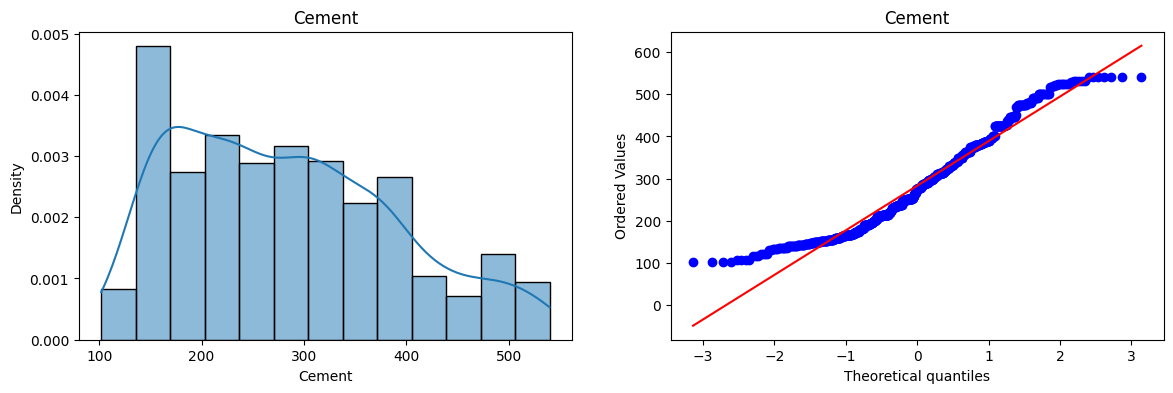

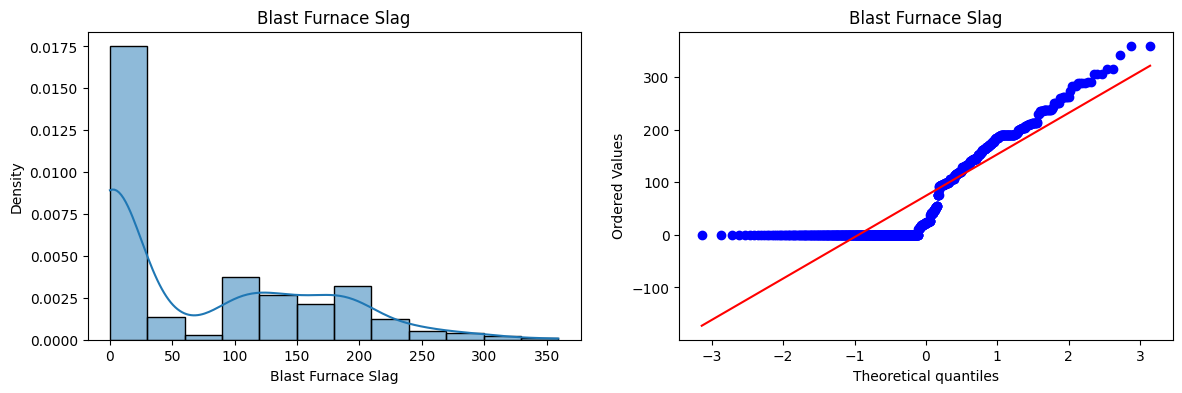

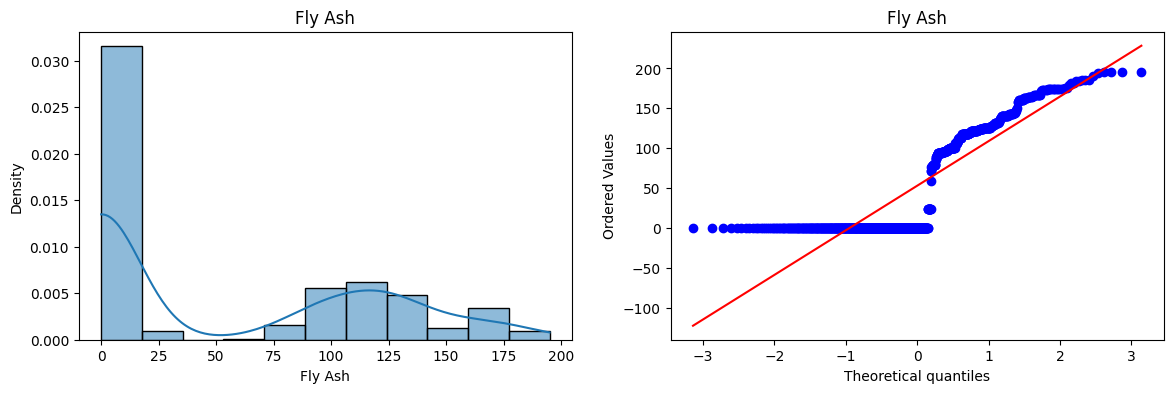

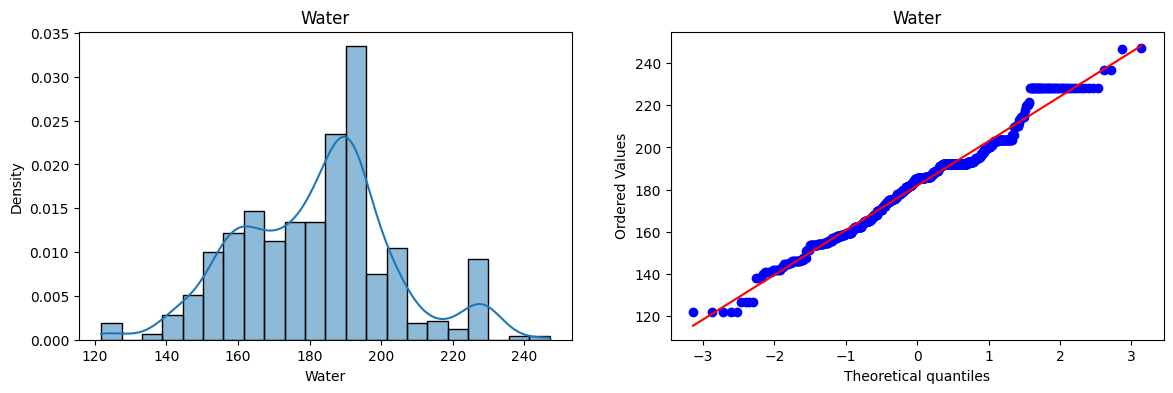

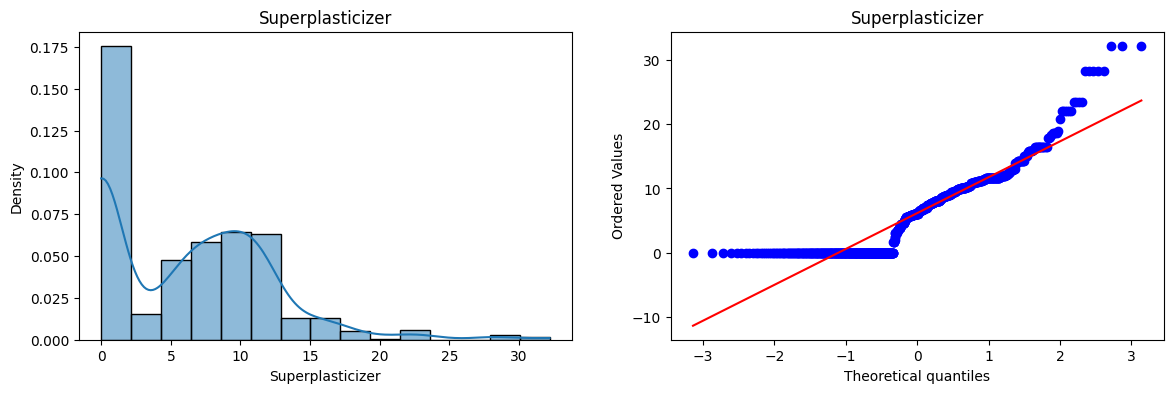

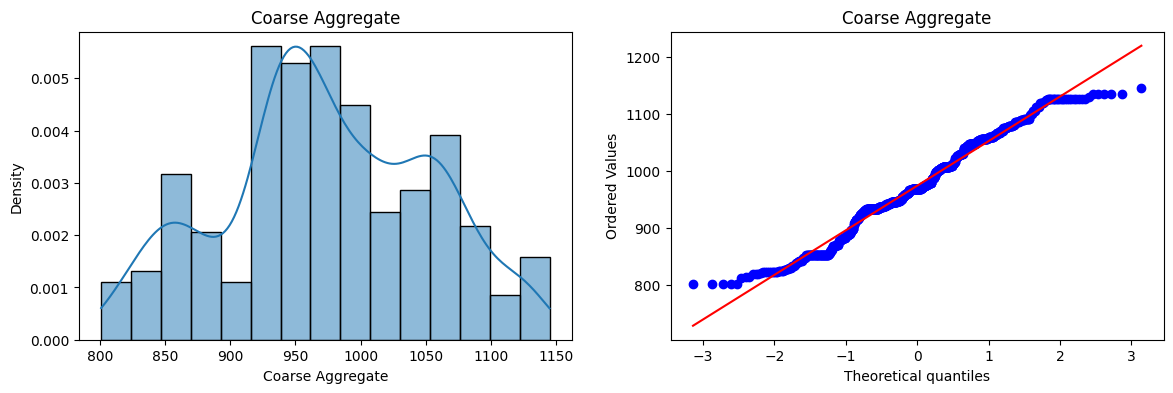

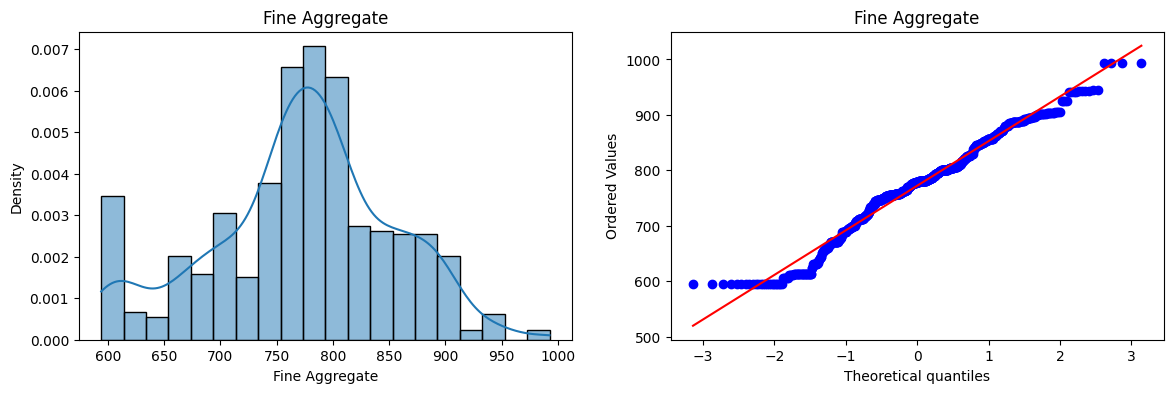

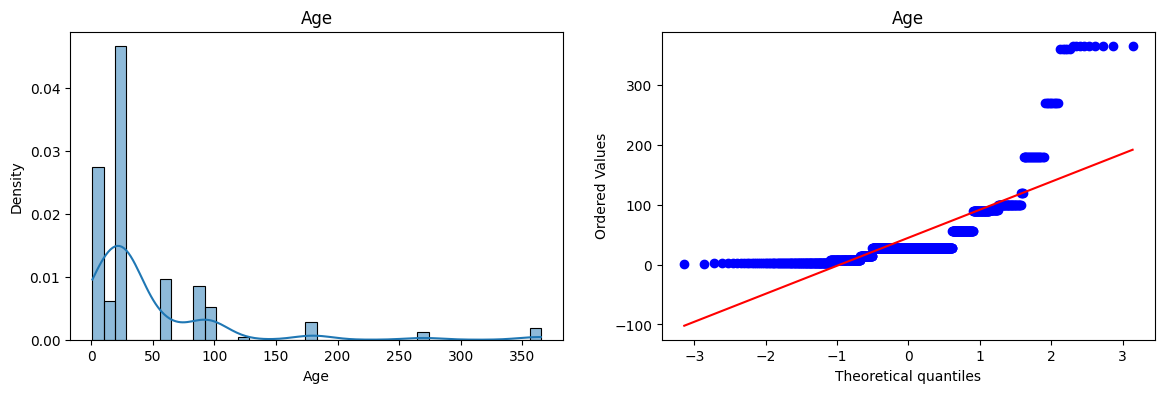

In [50]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat="density")
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [51]:
pt = PowerTransformer(method="box-cox")

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [52]:
lr = LinearRegression()

lr.fit(X_train_transformed,Y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(Y_test,y_pred2)

0.8047825008599727

In [53]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537941434358)

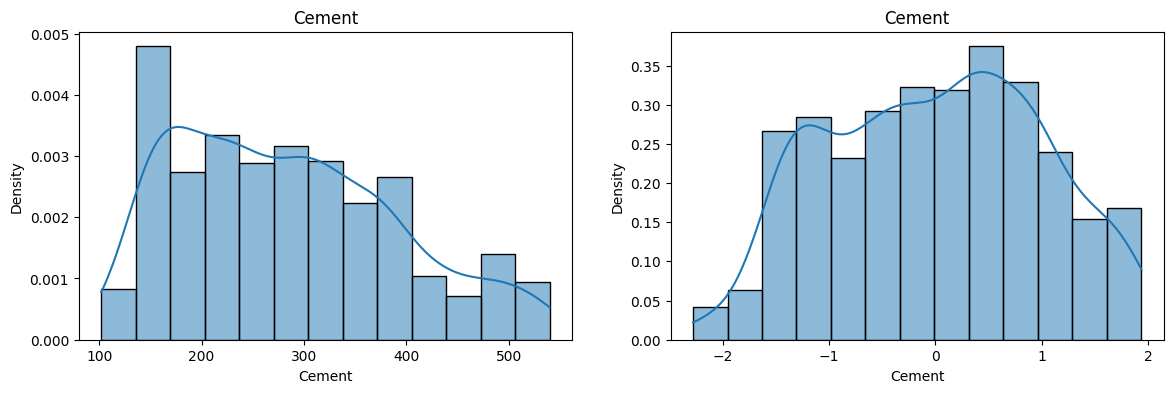

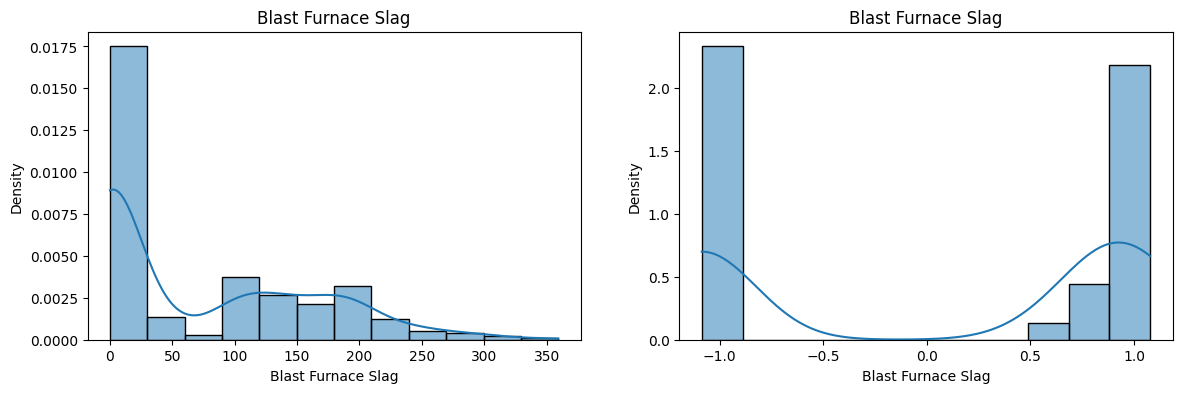

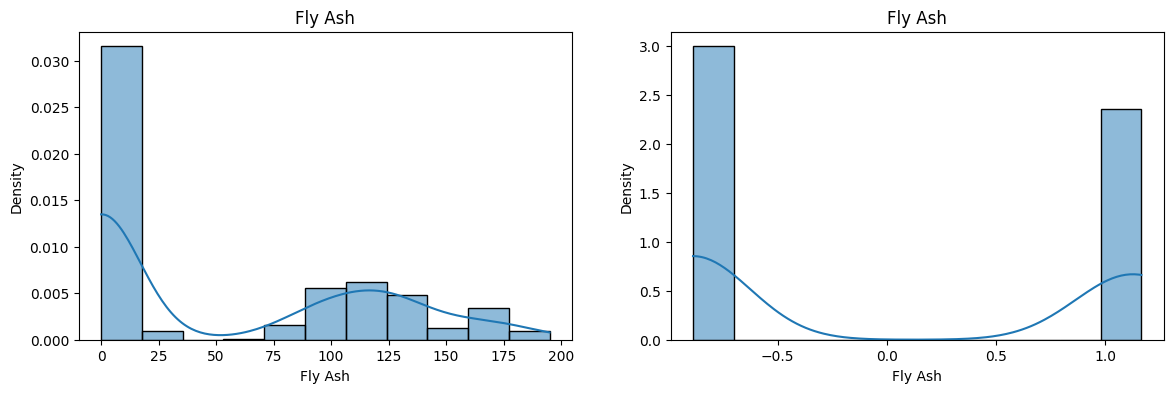

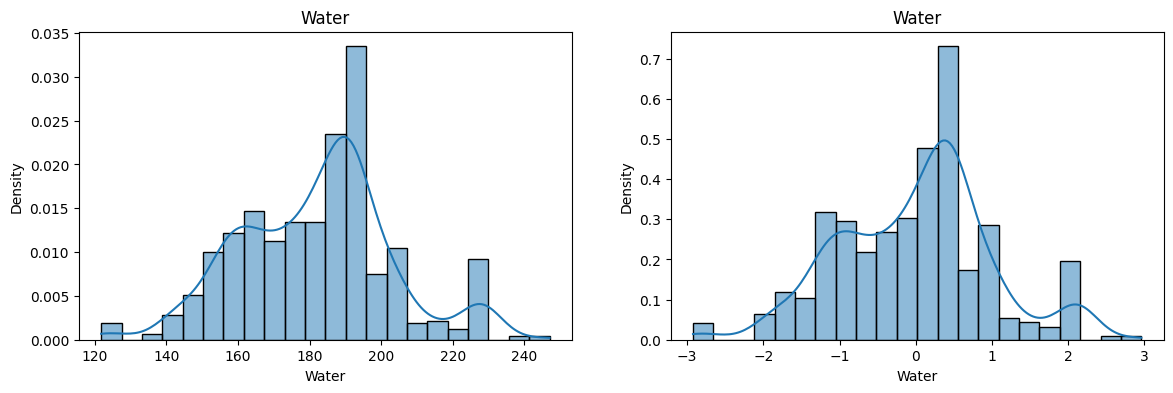

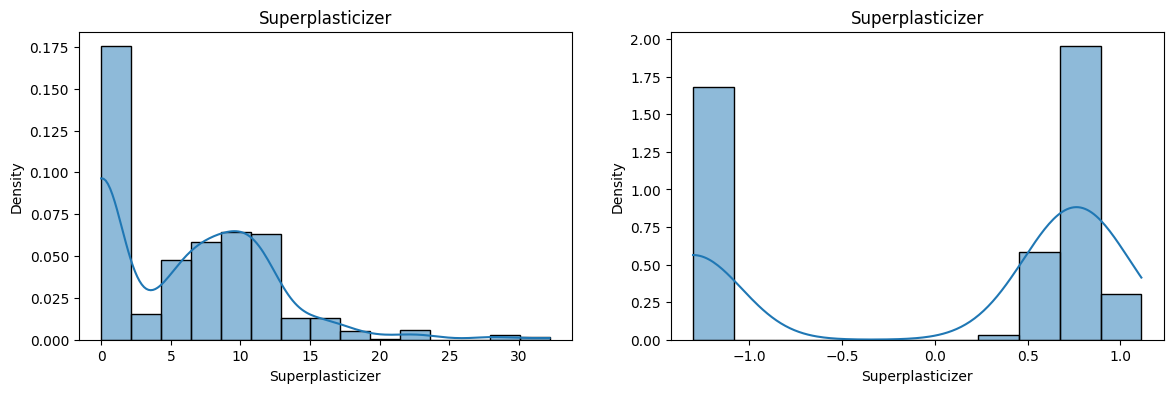

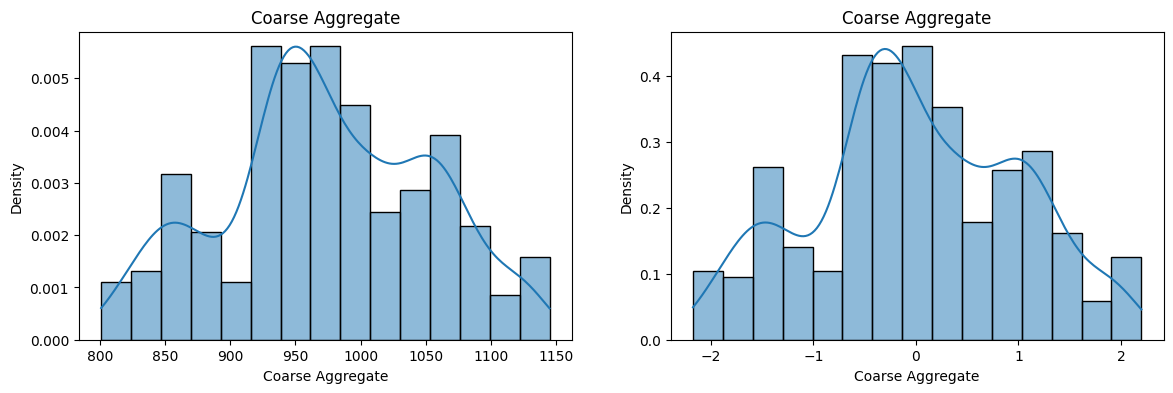

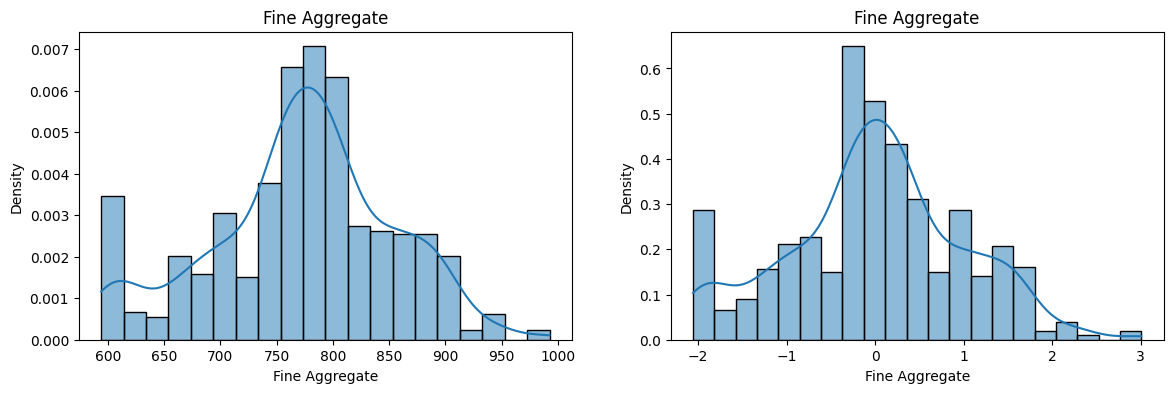

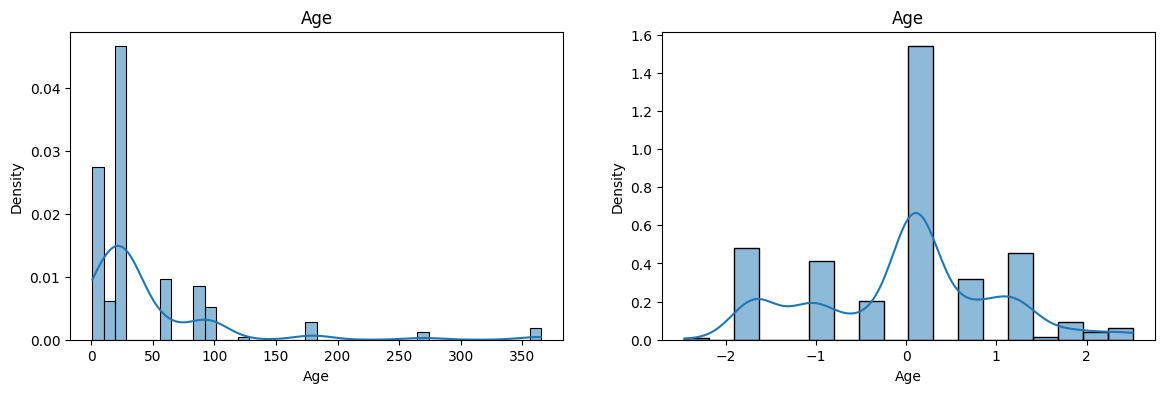

In [54]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat="density")
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True,stat="density")
    plt.title(col)

    plt.show()

In [55]:
pt1 = PowerTransformer(method="yeo-johnson")

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed1 = pt1.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_transformed2,Y_train)
y_pred3 = lr.predict(X_test_transformed1)

print(r2_score(Y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


0.8161906511597935


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [56]:
pt1 = PowerTransformer()
X_transformed2 = pt1.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring="r2"))

np.float64(0.6834625126992435)

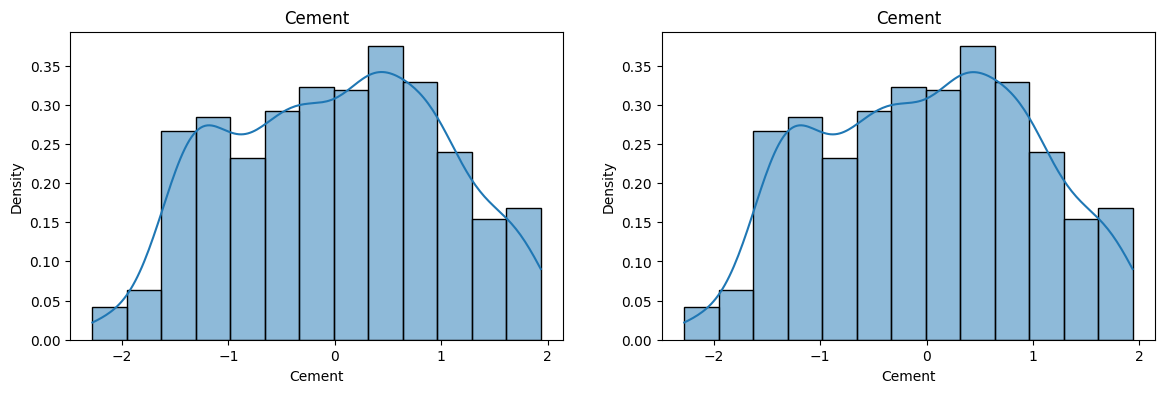

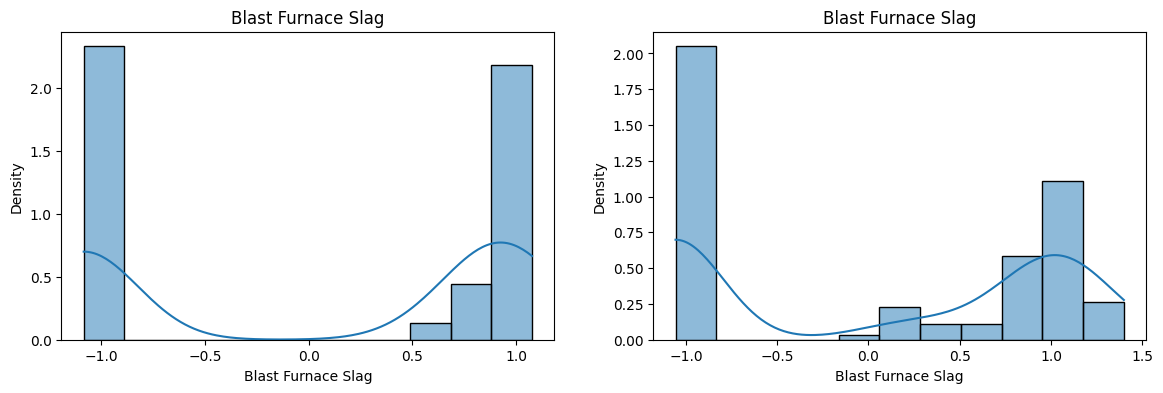

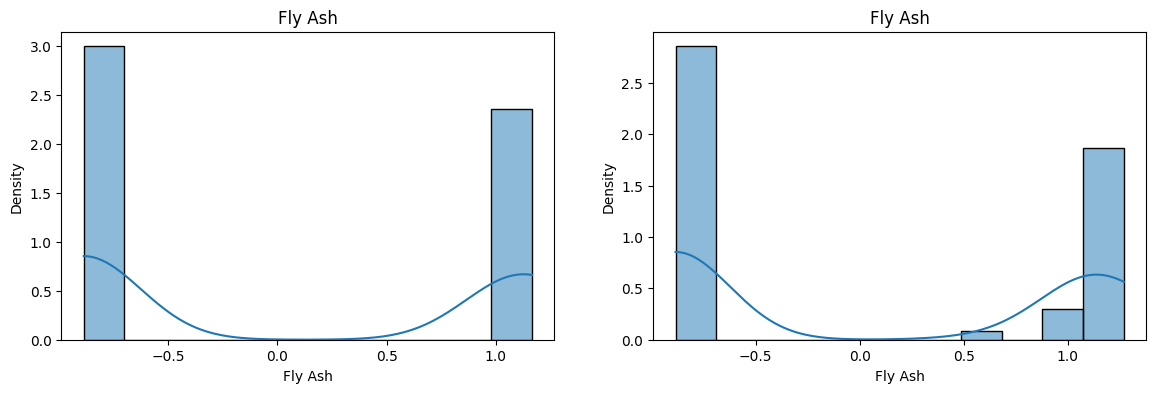

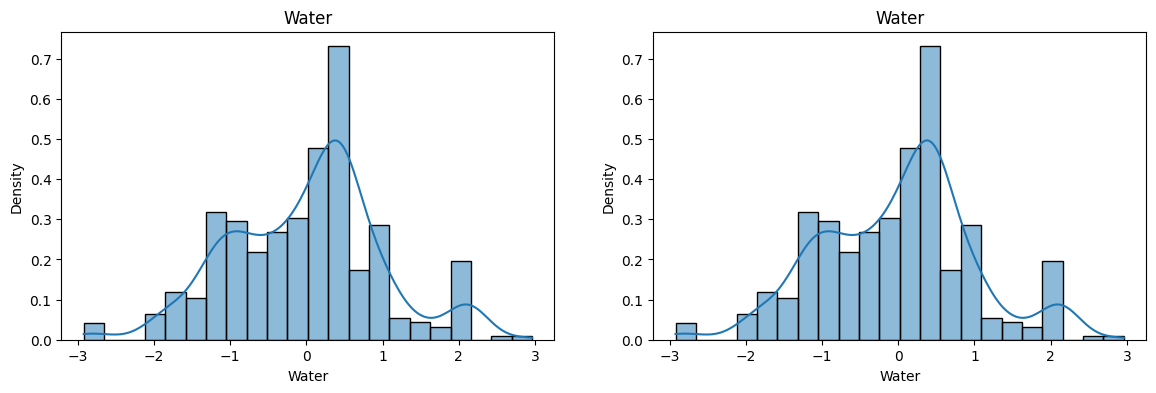

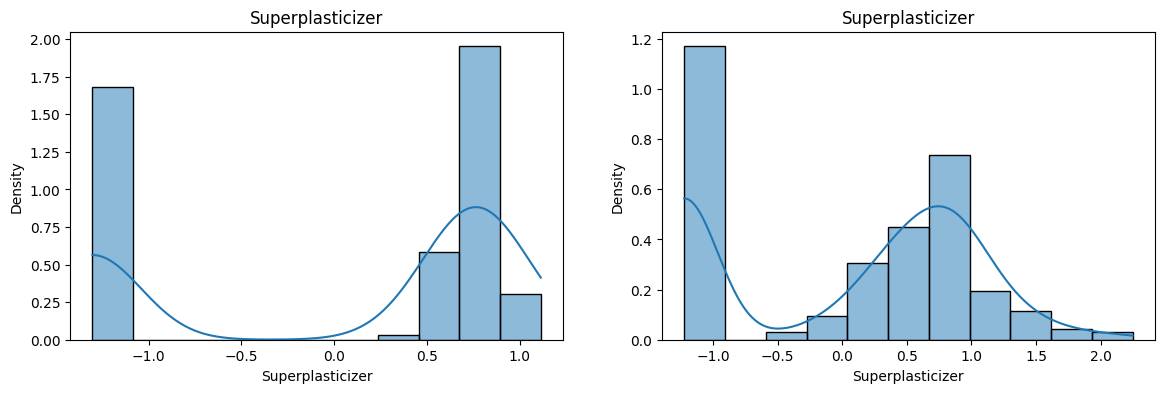

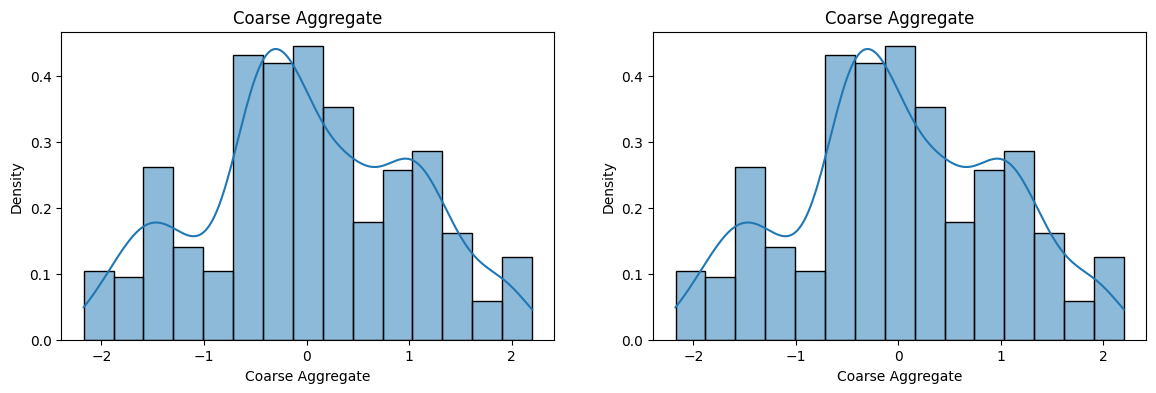

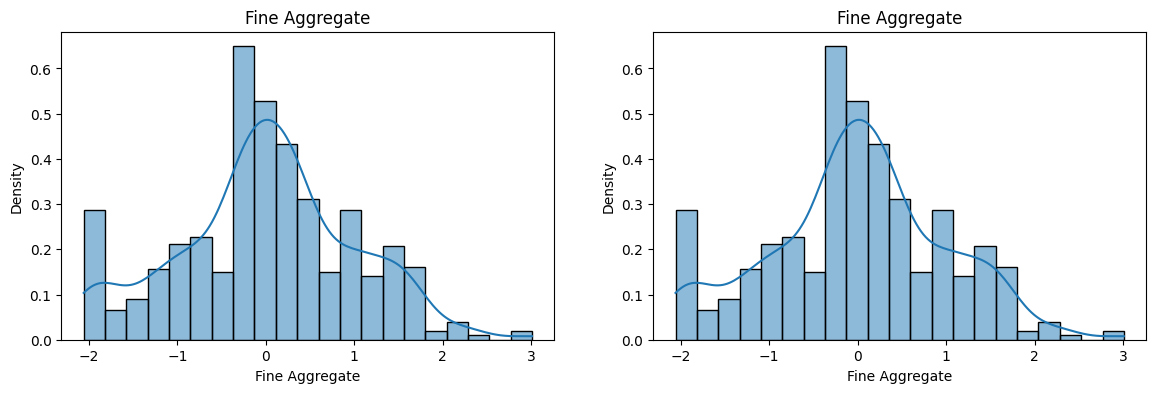

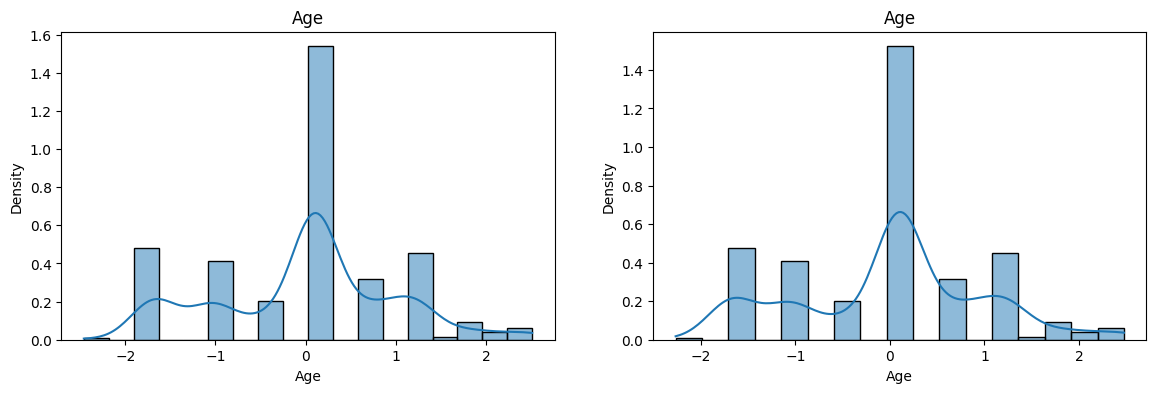

In [60]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True,stat="density")
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True,stat="density")
    plt.title(col)

In [61]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.022924,0.016633
2,Fly Ash,-0.028797,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.087911,0.264160
5,Coarse Aggregate,1.129167,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048975,0.001771
